En este notebook se analizará y se obtendrá los datos necesarios para la creación de un modelo predictivo.


   * [1 Importacion de los datos de partida<b>](#1)
   * [2 Filtrado por las competiciones con recompensa <b>](#2)
       * [2.1 Exploracion del DataFrame<b>](#3)
   * [3 Obtención de los campos<b>](#4)
       * [3.1 Tier Team Members<b>](#5)
       * [3.2 Analizando Public Score<b>](#6)
       * [3.3 Analisis evaluationMetric<b>](#7)
       * [3.4 totalTeams completo<b>](#8)
       * [3.5 totalEntries completo</b>](#9)
       * [3.6 Total Tiers</b>](#10)
       * [3.7 Categorizacion de HostSegment</b>](#11)
       * [3.8 Categorizacion de evaluationMetricCompleted</b>](#12)
       * [3.9 Trasformacion de la columna rewardQuantity</b>](#13)
       * [3.10 totalAveragePublicScore</b>](#14)
       * [3.11 Position Public</b>](#15)
   * [4 Exportación del Modelo Final <b>](#16)

In [1]:
#Importación de las librarias a utilzar

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter("ignore")

   <a id=1></a>
**<h2>1 Importacion de los datos de partida</h2>**

In [2]:
%cd C:\Users\Víctor Galán Alcón\Desktop\Kaggle\Data

pd.set_option('display.max_colwidth', -1)
df = pd.read_csv('dfKaggleCompleted.csv', index_col = 0)
df.head(1)

C:\Users\Víctor Galán Alcón\Desktop\Kaggle\Data


,change,competitionId,competitionTitle,deadline,entries,evaluationMetric,hostSegment,lastSubmission,publicScore,rank,rewardQuantity,score,teamMembers,teamName,totalTeams
0,-21,3897,Acquire Valued Shoppers Challenge,2014-07-14T23:59:00Z,140,NaN,featured,2014-07-11T19:29:44.5233333Z,0.50859,138,30000,0.5974,"[{'profileUrl': '/spimenov', 'thumbnailUrl': 'https://storage.googleapis.com/kaggle-avatars/thumbnails/default-thumb.png', 'tier': 'expert', 'displayName': 'pim'}]",pim#,952.0


In [3]:
print("Are There Missing Data? :",df.isnull().any().any())     
print(df.isnull().sum())

Are There Missing Data? : True
change              207   
competitionId       0     
competitionTitle    0     
deadline            0     
entries             0     
evaluationMetric    363902
hostSegment         0     
lastSubmission      276   
publicScore         0     
rank                0     
rewardQuantity      0     
score               0     
teamMembers         0     
teamName            0     
totalTeams          236250
dtype: int64


In [4]:
df.dtypes

change              object 
competitionId       int64  
competitionTitle    object 
deadline            object 
entries             int64  
evaluationMetric    object 
hostSegment         object 
lastSubmission      object 
publicScore         float64
rank                object 
rewardQuantity      object 
score               object 
teamMembers         object 
teamName            object 
totalTeams          float64
dtype: object

   <a id=2></a>
**<h2>2 Filtrado por las competiciones con recompensa</h2>**


In [5]:
%cd C:\Users\Víctor Galán Alcón\Desktop\Kaggle\Data\dataFramesReady\competitionsReady

pd.set_option('display.max_colwidth', -1)
competitionsReady = pd.read_csv('competitionsReady.csv', index_col = 0)

CompetitionsReady_Reward = competitionsReady[competitionsReady['rewardQuantity'].str.contains("0")]
CompetitionsReady_Reward = CompetitionsReady_Reward[CompetitionsReady_Reward.competitionId != "tart"]
#CompetitionsReady_Reward['competitionId'] = CompetitionsReady_Reward['competitionId'].astype(float).astype(int)
List_CompetitionsReady_Reward = list(CompetitionsReady_Reward.competitionId)

C:\Users\Víctor Galán Alcón\Desktop\Kaggle\Data\dataFramesReady\competitionsReady


In [6]:
dfCompetitionsReward = df[df["competitionId"].isin(List_CompetitionsReady_Reward)]
len(dfCompetitionsReward.competitionId.unique())

217

In [7]:
dfCompetitionsReward.head(100)

,change,competitionId,competitionTitle,deadline,entries,evaluationMetric,hostSegment,lastSubmission,publicScore,rank,rewardQuantity,score,teamMembers,teamName,totalTeams
0,-21,3897,Acquire Valued Shoppers Challenge,2014-07-14T23:59:00Z,140,NaN,featured,2014-07-11T19:29:44.5233333Z,0.50859,138,30000,0.5974,"[{'profileUrl': '/spimenov', 'thumbnailUrl': 'https://storage.googleapis.com/kaggle-avatars/thumbnails/default-thumb.png', 'tier': 'expert', 'displayName': 'pim'}]",pim#,952.0
1,-21,3897,Acquire Valued Shoppers Challenge,2014-07-14T23:59:00Z,140,NaN,featured,2014-07-11T19:29:44.5233333Z,0.56328,138,30000,0.5974,"[{'profileUrl': '/spimenov', 'thumbnailUrl': 'https://storage.googleapis.com/kaggle-avatars/thumbnails/default-thumb.png', 'tier': 'expert', 'displayName': 'pim'}]",pim#,952.0
2,-21,3897,Acquire Valued Shoppers Challenge,2014-07-14T23:59:00Z,140,NaN,featured,2014-07-11T19:29:44.5233333Z,0.56719,138,30000,0.5974,"[{'profileUrl': '/spimenov', 'thumbnailUrl': 'https://storage.googleapis.com/kaggle-avatars/thumbnails/default-thumb.png', 'tier': 'expert', 'displayName': 'pim'}]",pim#,952.0
3,-21,3897,Acquire Valued Shoppers Challenge,2014-07-14T23:59:00Z,140,NaN,featured,2014-07-11T19:29:44.5233333Z,0.57445,138,30000,0.5974,"[{'profileUrl': '/spimenov', 'thumbnailUrl': 'https://storage.googleapis.com/kaggle-avatars/thumbnails/default-thumb.png', 'tier': 'expert', 'displayName': 'pim'}]",pim#,952.0
4,-21,3897,Acquire Valued Shoppers Challenge,2014-07-14T23:59:00Z,140,NaN,featured,2014-07-11T19:29:44.5233333Z,0.58086,138,30000,0.5974,"[{'profileUrl': '/spimenov', 'thumbnailUrl': 'https://storage.googleapis.com/kaggle-avatars/thumbnails/default-thumb.png', 'tier': 'expert', 'displayName': 'pim'}]",pim#,952.0
5,-21,3897,Acquire Valued Shoppers Challenge,2014-07-14T23:59:00Z,140,NaN,featured,2014-07-11T19:29:44.5233333Z,0.58683,138,30000,0.5974,"[{'profileUrl': '/spimenov', 'thumbnailUrl': 'https://storage.googleapis.com/kaggle-avatars/thumbnails/default-thumb.png', 'tier': 'expert', 'displayName': 'pim'}]",pim#,952.0
6,-21,3897,Acquire Valued Shoppers Challenge,2014-07-14T23:59:00Z,140,NaN,featured,2014-07-11T19:29:44.5233333Z,0.58757,138,30000,0.5974,"[{'profileUrl': '/spimenov', 'thumbnailUrl': 'https://storage.googleapis.com/kaggle-avatars/thumbnails/default-thumb.png', 'tier': 'expert', 'displayName': 'pim'}]",pim#,952.0
7,-21,3897,Acquire Valued Shoppers Challenge,2014-07-14T23:59:00Z,140,NaN,featured,2014-07-11T19:29:44.5233333Z,0.58897,138,30000,0.5974,"[{'profileUrl': '/spimenov', 'thumbnailUrl': 'https://storage.googleapis.com/kaggle-avatars/thumbnails/default-thumb.png', 'tier': 'expert', 'displayName': 'pim'}]",pim#,952.0
8,-21,3897,Acquire Valued Shoppers Challenge,2014-07-14T23:59:00Z,140,NaN,featured,2014-07-11T19:29:44.5233333Z,0.59000,138,30000,0.5974,"[{'profileUrl': '/spimenov', 'thumbnailUrl': 'https://storage.googleapis.com/kaggle-avatars/thumbnails/default-thumb.png', 'tier': 'expert', 'displayName': 'pim'}]",pim#,952.0
9,-21,3897,Acquire Valued Shoppers Challenge,2014-07-14T23:59:00Z,140,NaN,featured,2014-07-11T19:29:44.5233333Z,0.59082,138,30000,0.5974,"[{'profileUrl': '/spimenov', 'thumbnailUrl': 'https://storage.googleapis.com/kaggle-avatars/thumbnails/default-thumb.png', 'tier': 'expert', 'displayName': 'pim'}]",pim#,952.0


   <a id=3></a>
**<h3>2.1 Exploracion del DataFrame</h3>** 

In [8]:
dfCompetitionsReward.shape

(973209, 15)

In [9]:
dfCompetitionsReward.dtypes

change              object 
competitionId       int64  
competitionTitle    object 
deadline            object 
entries             int64  
evaluationMetric    object 
hostSegment         object 
lastSubmission      object 
publicScore         float64
rank                object 
rewardQuantity      object 
score               object 
teamMembers         object 
teamName            object 
totalTeams          float64
dtype: object

In [10]:
print("Are There Missing Data? :",dfCompetitionsReward.isnull().any().any())     
print(dfCompetitionsReward.isnull().sum())

Are There Missing Data? : True
change              207   
competitionId       0     
competitionTitle    0     
deadline            0     
entries             0     
evaluationMetric    362375
hostSegment         0     
lastSubmission      276   
publicScore         0     
rank                0     
rewardQuantity      0     
score               0     
teamMembers         0     
teamName            0     
totalTeams          234276
dtype: int64


TotalTeams es un dato que se puede completar a partir de los datos de otras columnas y evaluationMetric se estudiará mas adelante. "Change" y "lastSubmission" no es relevante para este estudio.

Seleccionar las columnas que son relevantes para llegar al dataFrame Modelos

In [11]:
dfCompetitionsReward = dfCompetitionsReward[["competitionId",
                                            "entries",
                                            "evaluationMetric",
                                            "hostSegment",
                                            "publicScore",
                                            "rank",
                                            "rewardQuantity",
                                            "score",
                                            "teamMembers",
                                            "totalTeams",
                                            "teamName",
                                            "competitionTitle"]]

   <a id=4></a>
**<h2>3 Obtención de los campos</h2>** 

   <a id=5></a>
**<h3>3.1 Tier Team Members</h3>** 

In [12]:
TeamMembers = dfCompetitionsReward[["competitionId","teamMembers","rank"]]

TeamMembers = TeamMembers.drop_duplicates()

TeamMembers.index = TeamMembers.competitionId

TeamMembers = TeamMembers.drop_duplicates()

TeamMembers = TeamMembers.drop(columns=['competitionId'])

TeamMembers.head()

,teamMembers,rank
competitionId,,
3897,"[{'profileUrl': '/spimenov', 'thumbnailUrl': 'https://storage.googleapis.com/kaggle-avatars/thumbnails/default-thumb.png', 'tier': 'expert', 'displayName': 'pim'}]",138
3897,"[{'profileUrl': '/abhichan', 'thumbnailUrl': 'https://storage.googleapis.com/kaggle-avatars/thumbnails/76242-gp.jpg', 'tier': 'contributor', 'displayName': 'Abhijith CHandraprabhu'}, {'profileUrl': '/surana', 'thumbnailUrl': 'https://storage.googleapis.com/kaggle-avatars/thumbnails/97962-gr.jpg', 'tier': 'expert', 'displayName': 'The Clockwork'}]",849
3897,"[{'profileUrl': '/earino', 'thumbnailUrl': 'https://storage.googleapis.com/kaggle-avatars/thumbnails/44956-fb.jpg', 'tier': 'expert', 'displayName': 'earino'}]",363
3897,"[{'profileUrl': '/piotrkuchta', 'thumbnailUrl': 'https://storage.googleapis.com/kaggle-avatars/thumbnails/98973-kg.JPG', 'tier': 'expert', 'displayName': 'Piotr Kuchta'}]",382
3897,"[{'profileUrl': '/amirsadoughi', 'thumbnailUrl': 'https://storage.googleapis.com/kaggle-avatars/thumbnails/86123-gr.jpg', 'tier': 'contributor', 'displayName': 'Amir Sadoughi'}]",850


Obtención del tier de la columna teamMembers embebido dentro de un lista

In [13]:
TeamMembers = TeamMembers.reset_index().values.tolist()

In [14]:
import json 
import ast

detailsTeam = {}

lista = []

for i in range(len(TeamMembers)):
    teams = []
    title_teamMembers = TeamMembers[i]
    title = title_teamMembers[0]
    rank = title_teamMembers[2]
    teamMembers = title_teamMembers[1]
    teams.append(teamMembers)
    
    for n in range(len(teams)):
        team = []
        toadict = teams[n]
        json_data = ast.literal_eval(toadict)
        team.append(json_data)
        
        for member in range(len(team)):
            list_one = team[member]
            
            if list_one == None:
                #detailsTeam["numberMembers"] = None
                detailsTeam["competitionId"] = None
                detailsTeam["tier"] = None
                detailsTeam["rank"] = None
            else:
                for v in range(len(list_one)):
                    detailsTeam = {}
                    list_two = list_one[v]
                    #detailsTeam["numberMembers"] = len(list_one)
                    detailsTeam["competitionId"] = title
                    detailsTeam["tier"] = list_two['tier']
                    detailsTeam["rank"] = rank
                    lista.append(detailsTeam)


In [15]:
teamMembersDetail = pd.DataFrame(lista)
teamMembersDetail.head()

,competitionId,rank,tier
0,3897.0,138,expert
1,3897.0,849,contributor
2,3897.0,849,expert
3,3897.0,363,expert
4,3897.0,382,expert


In [16]:
print("Are There Missing Data? :",teamMembersDetail.isnull().any().any())     
print(teamMembersDetail.isnull().sum())

Are There Missing Data? : True
competitionId    1  
rank             1  
tier             152
dtype: int64


In [17]:
teamMembersDetail = teamMembersDetail.dropna()
teamMembersDetail.shape

(200302, 3)

In [18]:
len(teamMembersDetail.competitionId.unique())

191

In [19]:
teamMembersDetail.tier.unique()

array(['expert', 'contributor', 'novice', 'grandmaster', 'master',
       'staff', 'contributor tier', 'expert tier', 'novice tier',
       'master tier', 'grandmaster tier', 'staff tier'], dtype=object)

In [20]:
teamMembersDetail['tier'] = teamMembersDetail['tier'].replace(['contributor tier'], 
                                                          'contributor')
teamMembersDetail['tier'] = teamMembersDetail['tier'].replace(['expert tier'], 
                                                          'expert')
teamMembersDetail['tier'] = teamMembersDetail['tier'].replace(['grandmaster tier'], 
                                                          'grandmaster')
teamMembersDetail['tier'] = teamMembersDetail['tier'].replace(['master tier'], 
                                                          'master')
teamMembersDetail['tier'] = teamMembersDetail['tier'].replace(['novice tier'], 
                                                          'novice')
teamMembersDetail['tier'] = teamMembersDetail['tier'].replace(['staff tier'], 
                                                          'staff')

In [21]:
modelTeamMembers = pd.merge(teamMembersDetail,
                     dfCompetitionsReward, 
                     how = "inner", on = ["competitionId","rank"])
modelTeamMembers.head()

,competitionId,rank,tier,entries,evaluationMetric,hostSegment,publicScore,rewardQuantity,score,teamMembers,totalTeams,teamName,competitionTitle
0,3897.0,138,expert,140,NaN,featured,0.50859,30000,0.5974,"[{'profileUrl': '/spimenov', 'thumbnailUrl': 'https://storage.googleapis.com/kaggle-avatars/thumbnails/default-thumb.png', 'tier': 'expert', 'displayName': 'pim'}]",952.0,pim#,Acquire Valued Shoppers Challenge
1,3897.0,138,expert,140,NaN,featured,0.56328,30000,0.5974,"[{'profileUrl': '/spimenov', 'thumbnailUrl': 'https://storage.googleapis.com/kaggle-avatars/thumbnails/default-thumb.png', 'tier': 'expert', 'displayName': 'pim'}]",952.0,pim#,Acquire Valued Shoppers Challenge
2,3897.0,138,expert,140,NaN,featured,0.56719,30000,0.5974,"[{'profileUrl': '/spimenov', 'thumbnailUrl': 'https://storage.googleapis.com/kaggle-avatars/thumbnails/default-thumb.png', 'tier': 'expert', 'displayName': 'pim'}]",952.0,pim#,Acquire Valued Shoppers Challenge
3,3897.0,138,expert,140,NaN,featured,0.57445,30000,0.5974,"[{'profileUrl': '/spimenov', 'thumbnailUrl': 'https://storage.googleapis.com/kaggle-avatars/thumbnails/default-thumb.png', 'tier': 'expert', 'displayName': 'pim'}]",952.0,pim#,Acquire Valued Shoppers Challenge
4,3897.0,138,expert,140,NaN,featured,0.58086,30000,0.5974,"[{'profileUrl': '/spimenov', 'thumbnailUrl': 'https://storage.googleapis.com/kaggle-avatars/thumbnails/default-thumb.png', 'tier': 'expert', 'displayName': 'pim'}]",952.0,pim#,Acquire Valued Shoppers Challenge


Obtención del numero de jugadores que un equipo tiene por cada tier

In [22]:
dftiers = modelTeamMembers.groupby(['competitionId',"teamName","tier"]).agg({"tier": "count"})
dftiers = dftiers.rename(columns = {"tier" : "numberTier"})
dftiers = dftiers.reset_index()
dftiers.drop(columns=['tier'])
dftiers.head()

,competitionId,teamName,tier,numberTier
0,1003.0,0x0x,contributor,1
1,1003.0,2046,novice,2
2,1003.0,25教最帅,novice,1
3,1003.0,313,contributor,1
4,1003.0,313,novice,1


In [23]:
modelTiers = pd.pivot_table(dftiers, values='numberTier', index=['competitionId', 'teamName'],
                       columns=['tier'], aggfunc=np.sum)
modelTiers.fillna(0, inplace = True)

modelTiers.head()

tier                              contributor  expert  grandmaster  master  \
competitionId teamName                                                       
1003.0        0x0x                1.0          0.0     0.0          0.0      
              2046                0.0          0.0     0.0          0.0      
              25教最帅               0.0          0.0     0.0          0.0      
              313                 1.0          0.0     0.0          0.0      
              409 Huntington Ave  1.0          0.0     0.0          0.0      

tier                              novice  staff  
competitionId teamName                           
1003.0        0x0x                0.0     0.0    
              2046                2.0     0.0    
              25教最帅               1.0     0.0    
              313                 1.0     0.0    
              409 Huntington Ave  1.0     0.0

In [24]:
modelTiers = modelTiers.reset_index()

modelTiers['contributor'] = modelTiers['contributor'].astype(float).astype(int)
modelTiers['expert'] = modelTiers['expert'].astype(float).astype(int)
modelTiers['grandmaster'] = modelTiers['grandmaster'].astype(float).astype(int)
modelTiers['master'] = modelTiers['master'].astype(float).astype(int)
modelTiers['master'] = modelTiers['master'].astype(float).astype(int)
modelTiers['novice'] = modelTiers['novice'].astype(float).astype(int)
modelTiers['staff'] = modelTiers['staff'].astype(float).astype(int)
modelTiers['competitionId'] = modelTiers['competitionId'].astype(float).astype(int)

In [25]:
modelTiers.head()

tier,competitionId,teamName,contributor,expert,grandmaster,master,novice,staff
0,1003,0x0x,1,0,0,0,0,0
1,1003,2046,0,0,0,0,2,0
2,1003,25教最帅,0,0,0,0,1,0
3,1003,313,1,0,0,0,1,0
4,1003,409 Huntington Ave,1,0,0,0,1,0


In [26]:
modelTeamDetails = pd.merge(modelTiers,
                     modelTeamMembers, 
                     how = "inner", on = ["competitionId","teamName"])
modelTeamDetails.head(1)

,competitionId,teamName,contributor,expert,grandmaster,master,novice,staff,rank,tier,entries,evaluationMetric,hostSegment,publicScore,rewardQuantity,score,teamMembers,totalTeams,competitionTitle
0,1003,0x0x,1,0,0,0,0,0,398,contributor,12,Root Mean Squared Error,Featured,0.0,"$45,000",1.00099,"[{'name': '0x0x', 'tier': 'contributor tier'}]",3611.0,Google Analytics Customer Revenue Prediction


In [27]:
modelTeamDetails = modelTeamDetails.drop(columns=['tier',"teamMembers"])
modelTeamDetails.head(1)

,competitionId,teamName,contributor,expert,grandmaster,master,novice,staff,rank,entries,evaluationMetric,hostSegment,publicScore,rewardQuantity,score,totalTeams,competitionTitle
0,1003,0x0x,1,0,0,0,0,0,398,12,Root Mean Squared Error,Featured,0.0,"$45,000",1.00099,3611.0,Google Analytics Customer Revenue Prediction


In [28]:
modelTeamDetails["totalMembers"] = modelTeamDetails["contributor"] + modelTeamDetails["expert"] + modelTeamDetails["grandmaster"] + modelTeamDetails["master"] + modelTeamDetails["novice"] + modelTeamDetails["staff"]

In [29]:
modelTeamDetails.head()

,competitionId,teamName,contributor,expert,grandmaster,master,novice,staff,rank,entries,evaluationMetric,hostSegment,publicScore,rewardQuantity,score,totalTeams,competitionTitle,totalMembers
0,1003,0x0x,1,0,0,0,0,0,398,12,Root Mean Squared Error,Featured,0.0,"$45,000",1.00099,3611.0,Google Analytics Customer Revenue Prediction,1
1,1003,2046,0,0,0,0,2,0,298,2,Root Mean Squared Error,Featured,0.0,"$45,000",0.88843,3611.0,Google Analytics Customer Revenue Prediction,2
2,1003,2046,0,0,0,0,2,0,298,2,Root Mean Squared Error,Featured,0.0,"$45,000",0.88843,3611.0,Google Analytics Customer Revenue Prediction,2
3,1003,25教最帅,0,0,0,0,1,0,559,5,Root Mean Squared Error,Featured,0.0,"$45,000",1.63786,3611.0,Google Analytics Customer Revenue Prediction,1
4,1003,313,1,0,0,0,1,0,25,7,Root Mean Squared Error,Featured,0.0,"$45,000",0.88474,3611.0,Google Analytics Customer Revenue Prediction,2


In [30]:
modelTeamDetails.dtypes

competitionId       int32  
teamName            object 
contributor         int32  
expert              int32  
grandmaster         int32  
master              int32  
novice              int32  
staff               int32  
rank                object 
entries             int64  
evaluationMetric    object 
hostSegment         object 
publicScore         float64
rewardQuantity      object 
score               object 
totalTeams          float64
competitionTitle    object 
totalMembers        int32  
dtype: object

In [31]:
modelTeamDetails["rank"] = modelTeamDetails["rank"].astype(float).astype(int)

   <a id=6></a>
**<h3>3.2 Analizando Public Score</h3>** 

Se sabe que cada evaluationMetric tiene su forma de ponderar en que posicion se queda a partir de un Score. Además hay competiciones en los que no se dan ningun dato publico.

Se filtra los 100 primeros en el ranking.

In [32]:
publicAnalysis = modelTeamDetails[modelTeamDetails["rank"] <= 100]
publicAnalysis.head()

,competitionId,teamName,contributor,expert,grandmaster,master,novice,staff,rank,entries,evaluationMetric,hostSegment,publicScore,rewardQuantity,score,totalTeams,competitionTitle,totalMembers
4,1003,313,1,0,0,0,1,0,25,7,Root Mean Squared Error,Featured,0.0,"$45,000",0.88474,3611.0,Google Analytics Customer Revenue Prediction,2
5,1003,313,1,0,0,0,1,0,25,7,Root Mean Squared Error,Featured,0.0,"$45,000",0.88474,3611.0,Google Analytics Customer Revenue Prediction,2
18,1003,AK ML,0,2,0,0,0,0,41,2,Root Mean Squared Error,Featured,0.0,"$45,000",0.88547,3611.0,Google Analytics Customer Revenue Prediction,2
19,1003,AK ML,0,2,0,0,0,0,41,2,Root Mean Squared Error,Featured,0.0,"$45,000",0.88547,3611.0,Google Analytics Customer Revenue Prediction,2
46,1003,Aguiar,0,0,0,1,0,0,43,2,Root Mean Squared Error,Featured,0.0,"$45,000",0.88552,3611.0,Google Analytics Customer Revenue Prediction,1


In [33]:
publicAnalysis["publicScore"] = publicAnalysis["publicScore"].astype(float)
publicAnalysis["score"] = publicAnalysis["score"].astype(float)

In [34]:
publicAnalysis["publicScore"].describe()

count    3.399390e+05
mean     1.582931e+14
std      9.229158e+16
min     -2.423800e-01
25%      3.652200e-01
50%      6.468100e-01
75%      9.072100e-01
max      5.380995e+19
Name: publicScore, dtype: float64

In [35]:
average_public_score = publicAnalysis.groupby('competitionId', as_index = False).agg({
    "publicScore" : "mean",
    "score" : "mean"}
)
average_public_score.head()

,competitionId,publicScore,score
0,1003,0.000000,0.885435
1,1015,0.825526,0.886702
2,1033,0.116324,0.198500
3,1038,1.304936,0.874682
4,1044,3.695985,3.602915


In [36]:
average_public_score["publicScore"].describe()

count    1.910000e+02
mean     3.570691e+14
std      4.934792e+15
min      0.000000e+00
25%      3.846696e-01
50%      6.853225e-01
75%      9.428668e-01
max      6.820019e+16
Name: publicScore, dtype: float64

Que el mimino sea 0, significa que no se han aportado datos publicos.
¿Cuantos son?

In [37]:
noPublicData = average_public_score[average_public_score["publicScore"] == 0]
noPublicData

,competitionId,publicScore,score
0,1003,0.0,0.885435
9,1279,0.0,0.317873
49,3023,0.0,0.756399
159,6775,0.0,0.207923
178,8089,0.0,0.553724


Como son muy pocas las competiciones que no aportan datos publicos,existe la opción de no contar con ellas o de suponer que se han aportado el 100% de los datos. 
Esto significa que este modelo sera entrenado para competiciones que siempre aporten datos publicos.

Por tanto las competiciones que tengan PublicScore = 0, serán sustituido por su valor en Score. Correspondiente al de private.

In [38]:
modelTeamDetails["publicScore"] = modelTeamDetails["publicScore"].astype(float)

modelTeamDetails.loc[modelTeamDetails["publicScore"] <= 0, "publicScore"] = modelTeamDetails["score"]

Verificación de que se ha sustituido correctamente:

In [39]:
publicAnalysis_2 = modelTeamDetails[modelTeamDetails["rank"] <= 10]

publicAnalysis_2["publicScore"] = publicAnalysis_2["publicScore"].astype(float)
publicAnalysis_2["score"] = publicAnalysis_2["score"].astype(float)

average_public_score_2 = publicAnalysis_2.groupby('competitionId', as_index = False).agg({
    "publicScore" : "mean",
    "score" : "mean"}
)

average_public_score_2.describe()

,competitionId,publicScore,score
count,189.000000,1.890000e+02,1.890000e+02
mean,4388.761905,7.582352e+07,7.238283e+07
std,2010.931231,9.446007e+08,9.056472e+08
min,1003.000000,7.058043e-03,4.526853e-03
25%,2984.000000,3.930548e-01,3.145511e-01
50%,3926.000000,6.661185e-01,7.103915e-01
75%,5260.000000,9.218306e-01,9.600869e-01
max,9988.000000,1.292118e+10,1.239217e+10


El valor de ScorePublic que se va a utilizar es la media de las puntuaciones que se ha obtenido a lo largo de todas la entries subidas:

In [40]:
modelTeamDetails["publicScore"] = modelTeamDetails["publicScore"].astype(float)
modelAveragePublicScore = modelTeamDetails.groupby(["competitionId","teamName"])["publicScore"].agg({"averagePublicScore": "mean"})
modelAveragePublicScore = modelAveragePublicScore.reset_index()
modelAveragePublicScore.head()

,competitionId,teamName,averagePublicScore
0,1003,0x0x,1.00099
1,1003,2046,0.88843
2,1003,25教最帅,1.63786
3,1003,313,0.88474
4,1003,409 Huntington Ave,2.25716


In [41]:
modelAveragePublicScore= pd.merge(modelAveragePublicScore, modelTeamDetails, on=['competitionId','teamName'], how='inner')
modelAveragePublicScore.head(100)

,competitionId,teamName,averagePublicScore,contributor,expert,grandmaster,master,novice,staff,rank,entries,evaluationMetric,hostSegment,publicScore,rewardQuantity,score,totalTeams,competitionTitle,totalMembers
0,1003,0x0x,1.000990e+00,1,0,0,0,0,0,398,12,Root Mean Squared Error,Featured,1.000990e+00,"$45,000",1.00099,3611.0,Google Analytics Customer Revenue Prediction,1
1,1003,2046,8.884300e-01,0,0,0,0,2,0,298,2,Root Mean Squared Error,Featured,8.884300e-01,"$45,000",0.88843,3611.0,Google Analytics Customer Revenue Prediction,2
2,1003,2046,8.884300e-01,0,0,0,0,2,0,298,2,Root Mean Squared Error,Featured,8.884300e-01,"$45,000",0.88843,3611.0,Google Analytics Customer Revenue Prediction,2
3,1003,25教最帅,1.637860e+00,0,0,0,0,1,0,559,5,Root Mean Squared Error,Featured,1.637860e+00,"$45,000",1.63786,3611.0,Google Analytics Customer Revenue Prediction,1
4,1003,313,8.847400e-01,1,0,0,0,1,0,25,7,Root Mean Squared Error,Featured,8.847400e-01,"$45,000",0.88474,3611.0,Google Analytics Customer Revenue Prediction,2
5,1003,313,8.847400e-01,1,0,0,0,1,0,25,7,Root Mean Squared Error,Featured,8.847400e-01,"$45,000",0.88474,3611.0,Google Analytics Customer Revenue Prediction,2
6,1003,409 Huntington Ave,2.257160e+00,1,0,0,0,1,0,787,1,Root Mean Squared Error,Featured,2.257160e+00,"$45,000",2.25716,3611.0,Google Analytics Customer Revenue Prediction,2
7,1003,409 Huntington Ave,2.257160e+00,1,0,0,0,1,0,787,1,Root Mean Squared Error,Featured,2.257160e+00,"$45,000",2.25716,3611.0,Google Analytics Customer Revenue Prediction,2
8,1003,6893梦之队,9.833300e-01,1,0,0,0,2,0,394,6,Root Mean Squared Error,Featured,9.833300e-01,"$45,000",0.98333,3611.0,Google Analytics Customer Revenue Prediction,3
9,1003,6893梦之队,9.833300e-01,1,0,0,0,2,0,394,6,Root Mean Squared Error,Featured,9.833300e-01,"$45,000",0.98333,3611.0,Google Analytics Customer Revenue Prediction,3


In [42]:
modelAveragePublicScore = modelAveragePublicScore.drop(columns=['publicScore'])


In [43]:
modelAveragePublicScore.shape

(1187465, 18)

In [44]:
modelAveragePublicScore = modelAveragePublicScore.drop_duplicates()
modelAveragePublicScore.shape

(174193, 18)

   <a id=7></a>
**<h3>3.3 Analisis evaluationMetric</h3>** 

Analizando el porcentaje de datos que no tenemos de esta variable:

In [45]:
(modelAveragePublicScore.evaluationMetric.isnull().sum()/modelAveragePublicScore.shape[0])*100

40.34260848598968

In [46]:
modelAveragePublicScore.evaluationMetric.unique()

array(['Root Mean Squared Error',
       'IntersectionOverUnionObjectSegmentation', 'RSNAObjectDetectionAP',
       'Weighted Multiclass Loss',
       'Area Under Receiver Operating Characteristic Curve',
       'QuadraticWeightedKappa', 'Matthews correlation coefficient',
       'Weighted Label Ranking Average Precision', 'F-Score', nan,
       'GoogleGlobalAP', 'Multiclass Loss', 'MCAP',
       'Multiclass Loss (Deprecated)', 'Log Loss',
       'Weighted Root Mean Squared Error', 'Mean Average Precision at K',
       'DarkWorldsMetric', 'Mean Absolute Error',
       'Bidirectional AUC for Cause Effect Pairs',
       'Gesture Normalized Levenshtein Mean', 'Categorization Accuracy',
       'Mean Columnwise Area Under Receiver Operating Characteristic Curve',
       'Mean Columnwise Root Mean Squared Error',
       'Multi-class logarithmic loss (logloss)',
       'Mean Average Precision @ 5 (MAP@5)', 'Dice coefficient',
       'Area Under Curve (AUC)', "Spearman's correlation coefficien

In [47]:
len(modelAveragePublicScore.evaluationMetric.unique())

50

Se va hacer un analisis de la posición final en funcón del score conseguido:

In [48]:
dtEvaluatioMetric_1 = modelAveragePublicScore[["score","rank","competitionId"]]

dtEvaluatioMetric_1["score"] = dtEvaluatioMetric_1["score"].astype(float)
dtEvaluatioMetric_1["rank"] = dtEvaluatioMetric_1["rank"].astype(float).astype(int)

Se realiza el estudio para los datos de Score de la primera posición de cada competición

In [49]:
dtEvaluationMetricRank1 = dtEvaluatioMetric_1[dtEvaluatioMetric_1["rank"] == 1]
dtEvaluationMetricRank1.head()

,score,rank,competitionId
519,0.88140,1,1003
21612,0.89646,1,1015
30182,0.25475,1,1033
35636,0.68503,1,1038
53334,3.57875,1,1044


Se analizará como se distribuye estos valores:

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


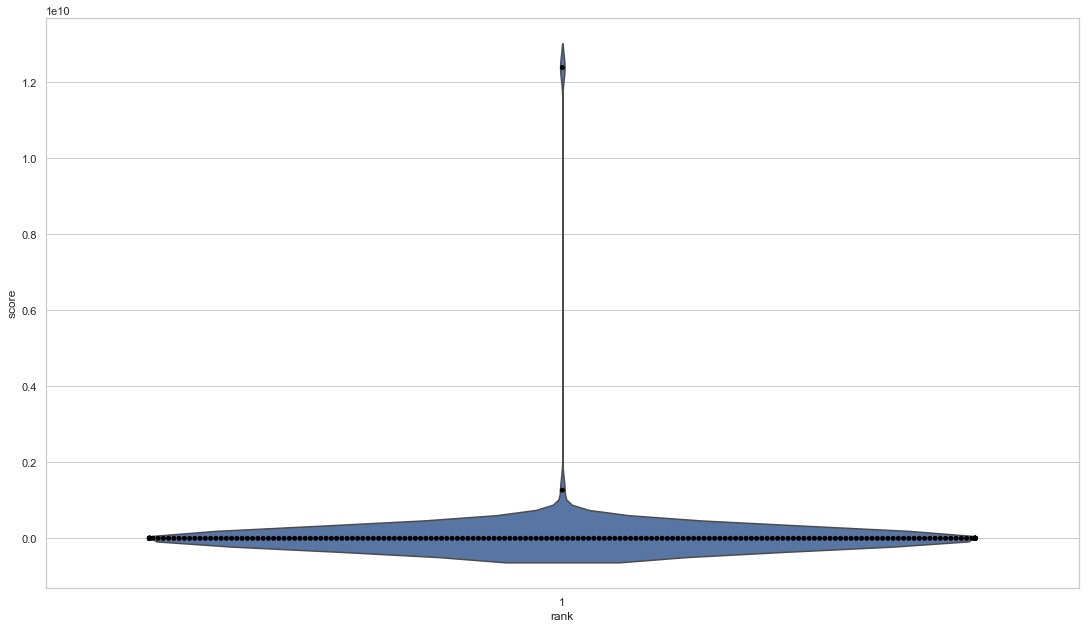

In [50]:
sns.set(style="whitegrid")

%pylab
%matplotlib inline

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)

ax = sns.violinplot(x="rank", y="score", data=dtEvaluationMetricRank1)
ax = sns.swarmplot(x="rank", y="score", data=dtEvaluationMetricRank1, color="black", edgecolor="black")

Se podria observar donde encontramos la gran mayoria de los scores, siendo otras competiciones outlaiers, o evaluationMetrics muy diferentes.

Clusterización de las competiciones para su estudio:

In [51]:
dtClusterEvaluatioMetric = dtEvaluatioMetric_1[dtEvaluatioMetric_1["rank"] == 1]
dtClusterEvaluatioMetric.head()

,score,rank,competitionId
519,0.88140,1,1003
21612,0.89646,1,1015
30182,0.25475,1,1033
35636,0.68503,1,1038
53334,3.57875,1,1044


Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


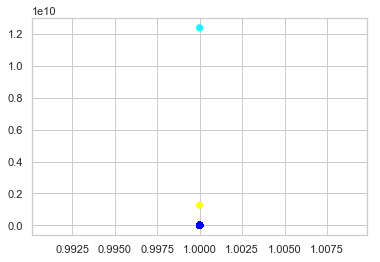

In [52]:
from sklearn.cluster import KMeans
%pylab
%matplotlib inline

kmeans = KMeans(n_clusters = 3, random_state = 10).fit(dtClusterEvaluatioMetric)
classes = kmeans.predict(dtClusterEvaluatioMetric)

colores=['blue','cyan','yellow']
asignar=[]
for row in classes:
    asignar.append(colores[row])


scatter(dtClusterEvaluatioMetric["rank"], dtClusterEvaluatioMetric["score"], c = asignar, cmap = 'Accent')


In [53]:
dtClusterEvaluatioMetric["colorCluster"] = asignar
dtClusterEvaluatioMetric.head()

,score,rank,competitionId,colorCluster
519,0.88140,1,1003,blue
21612,0.89646,1,1015,blue
30182,0.25475,1,1033,blue
35636,0.68503,1,1038,blue
53334,3.57875,1,1044,blue


In [54]:
dtClusterEvaluatioMetricCount = dtClusterEvaluatioMetric.groupby("colorCluster").agg({"colorCluster":"count"})
dtClusterEvaluatioMetricCount.head()

,colorCluster
colorCluster,
blue,188
cyan,1
yellow,1


Se analizan los diferentes clusteres de evaluación.

In [55]:
dtEvaluationMetricCyan = dtClusterEvaluatioMetric[(dtClusterEvaluatioMetric["colorCluster"] == "cyan")]
dtEvaluationMetricCyan.score.min()

12384507107.5455

Se coge el valor minimo para analizar la competicion con un score superior a este:

In [56]:
modelAveragePublicScore["score"] = modelAveragePublicScore["score"].astype(float)
modelAveragePublicScore["rank"] = modelAveragePublicScore["rank"].astype(float).astype(int)

dtEvaluationMetricCyan = modelAveragePublicScore[(modelAveragePublicScore["score"] >= 12384507107.5455) & 
                                                (modelAveragePublicScore["rank"] == 1)]

dtEvaluationMetricCyan.competitionTitle

563668    Santa's Stolen Sleigh
Name: competitionTitle, dtype: object

https://www.kaggle.com/c/santas-stolen-sleigh/overview/evaluation

In [57]:
modelEvaluationMetric = modelAveragePublicScore[(modelAveragePublicScore["competitionTitle"] != "Santa's Stolen Sleigh")]

In [58]:
dtEvaluationMetricYellow = dtClusterEvaluatioMetric[(dtClusterEvaluatioMetric["colorCluster"] == "yellow")]
dtEvaluationMetricYellow.score.min()

1267514147.57275

In [59]:
dtEvaluationMetricYellow = modelEvaluationMetric[(modelEvaluationMetric["score"] >= 1267514147.57275) &
                                                (modelEvaluationMetric["rank"] == 1)]
dtEvaluationMetricYellow.competitionTitle

345889    Helping Santa's Helpers
Name: competitionTitle, dtype: object

https://www.kaggle.com/c/helping-santas-helpers/overview/evaluation

In [60]:
modelEvaluationMetric = modelEvaluationMetric[(modelEvaluationMetric["competitionTitle"] != "Helping Santa's Helpers")]

In [61]:
dtEvaluationMetricBlue = modelEvaluationMetric[(modelEvaluationMetric["rank"] <= 11)]

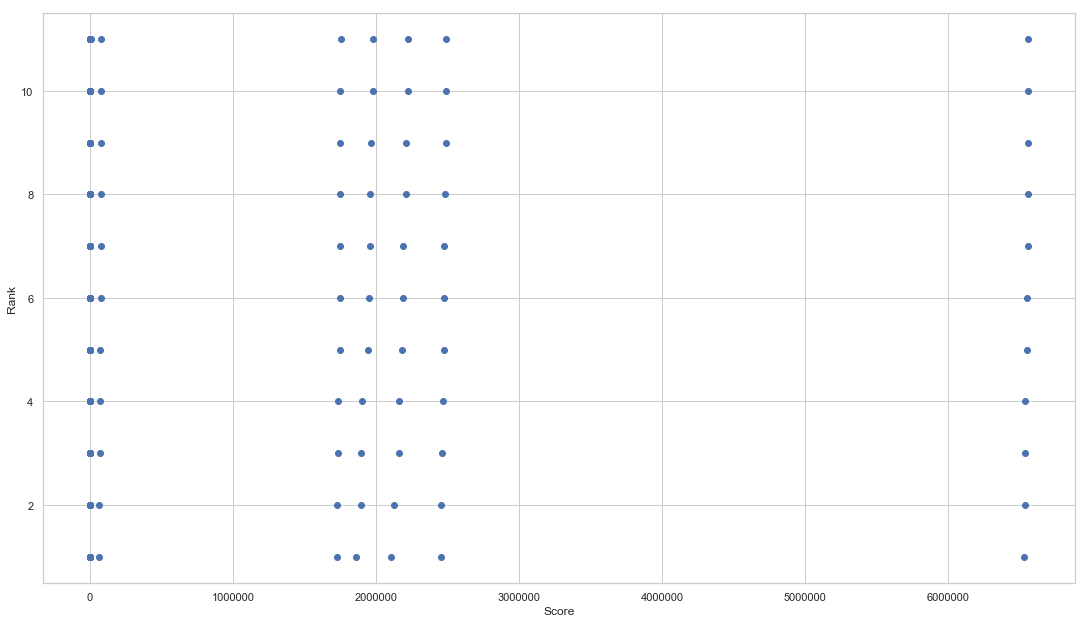

In [134]:
plt.scatter(dtEvaluationMetricBlue['score'], dtEvaluationMetricBlue['rank'])

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)

plt.xlabel('Score')
plt.ylabel('Rank')

plt.show()

In [63]:
dtEvaluationMetricBlue_1 = modelEvaluationMetric[(modelEvaluationMetric["score"] >= 6000000) &
                                                (modelEvaluationMetric["rank"] == 1)]
dtEvaluationMetricBlue_1.competitionTitle

232050    Traveling Santa Problem
Name: competitionTitle, dtype: object

https://www.kaggle.com/c/traveling-santa-problem

In [64]:
modelEvaluationMetric = modelEvaluationMetric[(modelEvaluationMetric["competitionTitle"] != "Traveling Santa Problem")]

In [65]:
dtEvaluationMetricBlue_2 = modelEvaluationMetric[(modelEvaluationMetric["score"] >= 1000000) &
                                                (modelEvaluationMetric["rank"] == 1)]
dtEvaluationMetricBlue_2.competitionTitle

249701    AMS 2013-2014 Solar Energy Prediction Contest
281510    Packing Santa's Sleigh                       
300155    The Random Number Grand Challenge            
396824    Restaurant Revenue Prediction                
Name: competitionTitle, dtype: object

AMS 2013-2014 Solar Energy Prediction Contest

https://www.kaggle.com/c/ams-2014-solar-energy-prediction-contest/overview/evaluation

Packing Santa's Sleigh

https://www.kaggle.com/c/packing-santas-sleigh/overview/evaluation

The Random Number Grand Challenge

https://www.kaggle.com/c/random-number-grand-challenge/overview/evaluation

Restaurant Revenue Prediction

https://www.kaggle.com/c/restaurant-revenue-prediction/overview/evaluation


In [66]:
dtEvaluationMetricBlue_3 = modelEvaluationMetric[(modelEvaluationMetric["score"] < 1000000) &
                                                (modelEvaluationMetric["rank"] <= 11)]

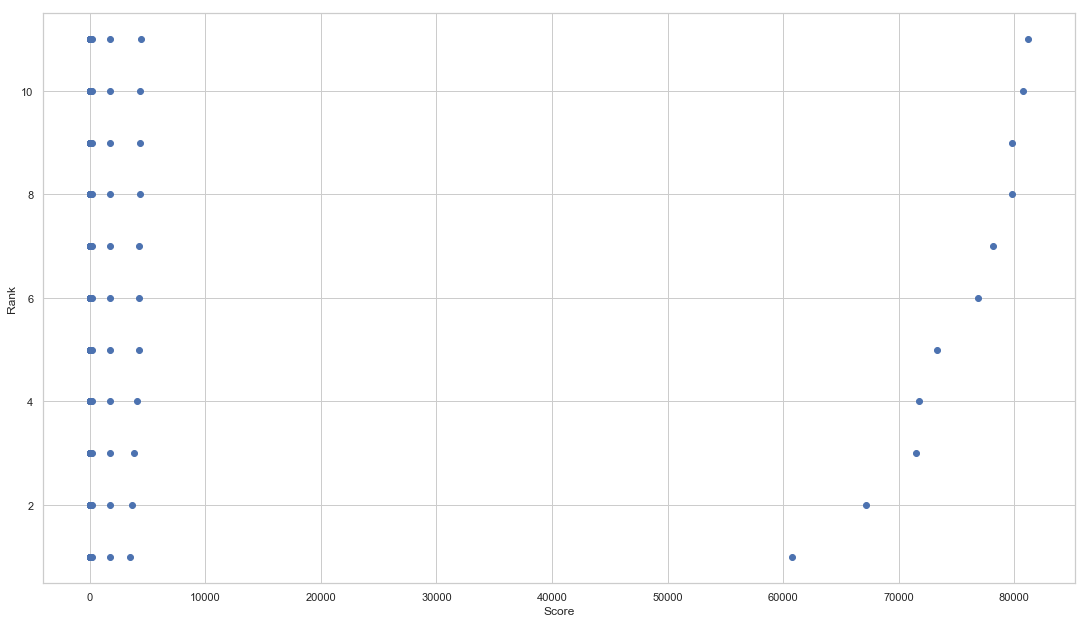

In [135]:
plt.scatter(dtEvaluationMetricBlue_3['score'], dtEvaluationMetricBlue_3['rank'])

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)

plt.xlabel('Score')
plt.ylabel('Rank')

plt.show()

In [68]:
dtEvaluationMetricBlue_4 = modelEvaluationMetric[(modelEvaluationMetric["score"] > 60000) &
                                                (modelEvaluationMetric["rank"] == 1)]
                                                  
dtEvaluationMetricBlue_4.competitionTitle.unique()

array(['Global Energy Forecasting Competition 2012 - Load Forecasting',
       'AMS 2013-2014 Solar Energy Prediction Contest',
       "Packing Santa's Sleigh", 'The Random Number Grand Challenge',
       'Restaurant Revenue Prediction'], dtype=object)

Global Energy Forecasting Competition 2012 - Load Forecasting

https://www.kaggle.com/c/global-energy-forecasting-competition-2012-load-forecasting/leaderboard

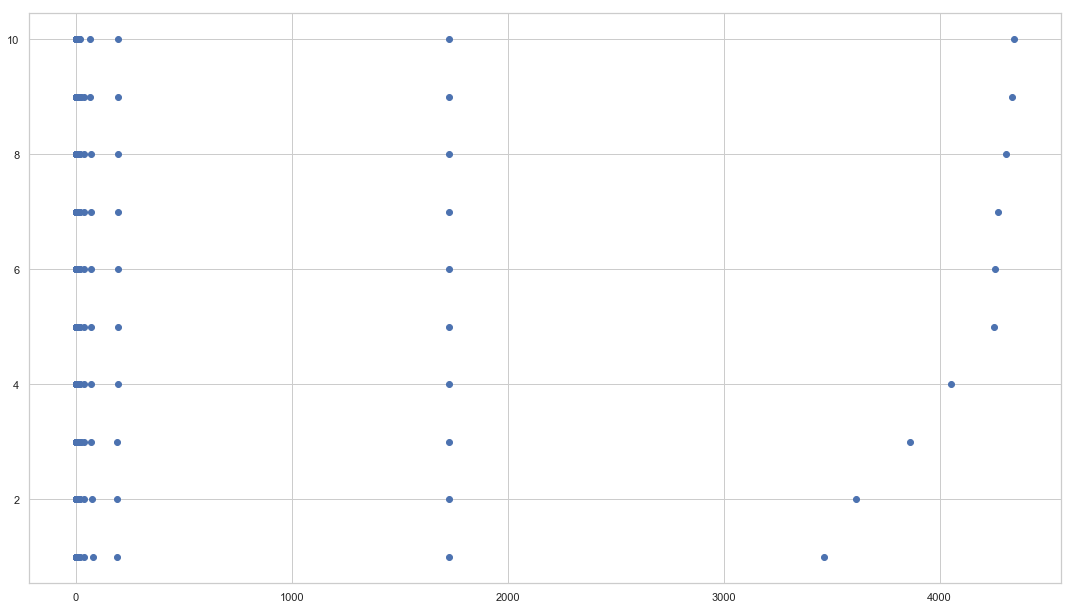

In [69]:
dtEvaluationMetricBlue_5 = modelEvaluationMetric[(modelEvaluationMetric["score"] < 60000) &
                                                (modelEvaluationMetric["rank"] <= 10)]

plt.scatter(dtEvaluationMetricBlue_5['score'], dtEvaluationMetricBlue_5['rank'])

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)

plt.show()

In [70]:
dtEvaluationMetricBlue_6 = dtEvaluationMetricBlue_5[(dtEvaluationMetricBlue_5["score"] > 1000) &
                                                (dtEvaluationMetricBlue_5["rank"] == 1)]
                                                  
dtEvaluationMetricBlue_6.competitionTitle.unique()

array(['Job Salary Prediction', 'The Winton Stock Market Challenge'],
      dtype=object)

Job Salary Prediction

https://www.kaggle.com/c/job-salary-prediction/overview/evaluation
    
The Winton Stock Market Challenge

https://www.kaggle.com/c/the-winton-stock-market-challenge/overview/evaluation


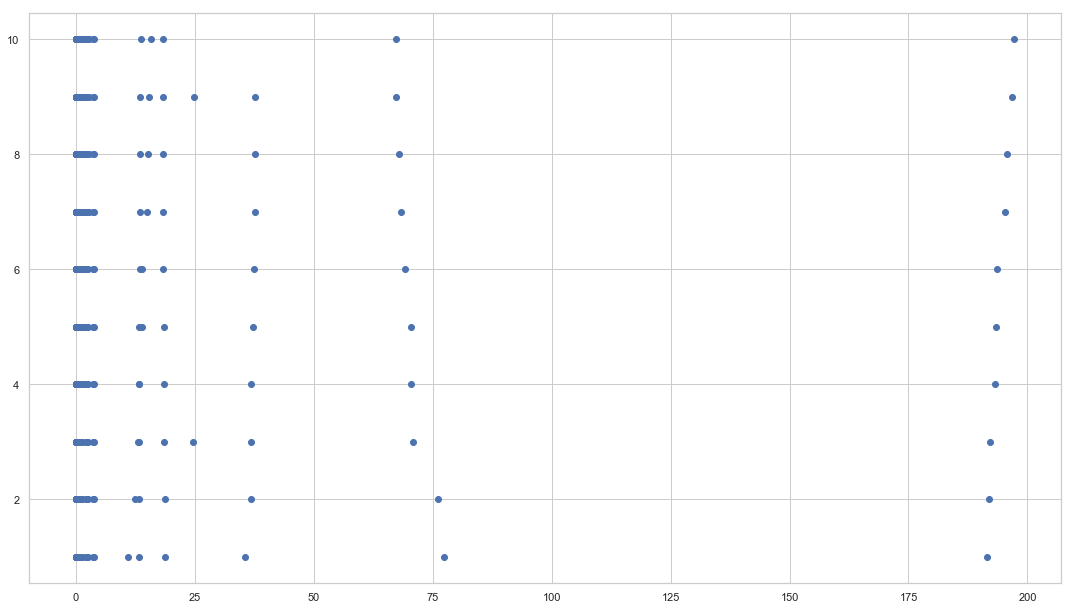

In [71]:
dtEvaluationMetricBlue_7 = modelEvaluationMetric[(modelEvaluationMetric["score"] < 1000) &
                                                (modelEvaluationMetric["rank"] <= 10)]

plt.scatter(dtEvaluationMetricBlue_7['score'], dtEvaluationMetricBlue_7['rank'])

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)

plt.show()

In [72]:
dtEvaluationMetricBlue_8 = dtEvaluationMetricBlue_7[(dtEvaluationMetricBlue_7["score"] > 25) &
                                                (dtEvaluationMetricBlue_7["rank"] == 1)]
                                                  
dtEvaluationMetricBlue_8.competitionTitle.unique()

array(['Predict HIV Progression', 'RTA Freeway Travel Time Prediction',
       'Web Traffic Time Series Forecasting'], dtype=object)

Predict HIV Progression



RTA Freeway Travel Time Prediction



Web Traffic Time Series Forecasting

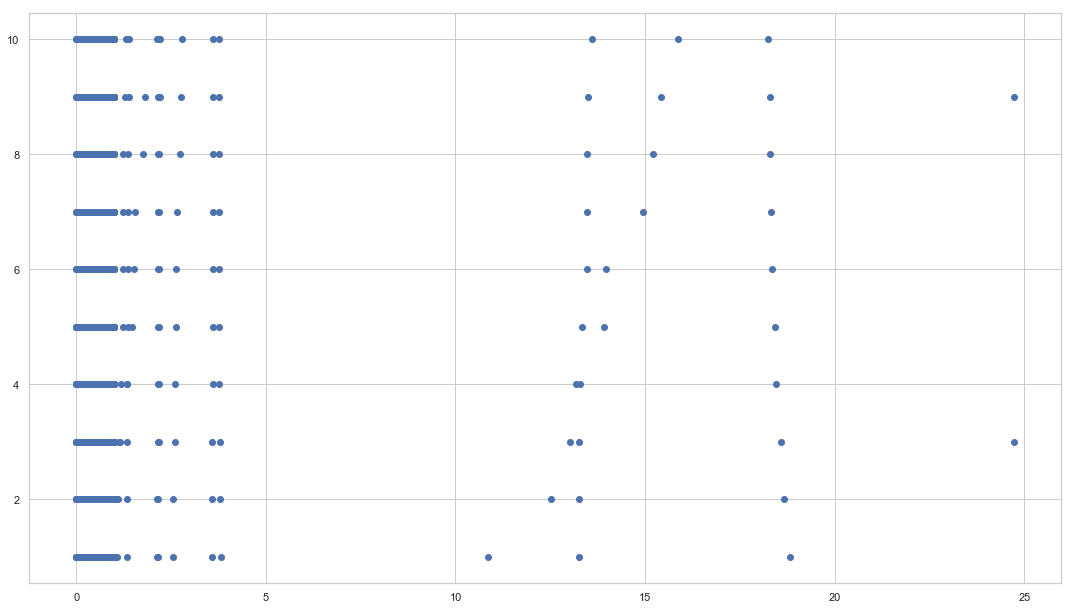

In [73]:
dtEvaluationMetricBlue_9 = modelEvaluationMetric[(modelEvaluationMetric["score"] < 25) &
                                                (modelEvaluationMetric["rank"] <= 10)]

plt.scatter(dtEvaluationMetricBlue_9['score'], dtEvaluationMetricBlue_9['rank'])

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)

plt.show()

In [74]:
dtEvaluationMetricBlue_10 = dtEvaluationMetricBlue_9[(dtEvaluationMetricBlue_9["score"] > 10) &
                                                (dtEvaluationMetricBlue_7["rank"] == 1)]
                                                  
dtEvaluationMetricBlue_10.competitionTitle.unique()

array(["dunnhumby's Shopper Challenge",
       'EMI Music Data Science Hackathon - July 21st - 24 hours',
       'NOAA Fisheries Steller Sea Lion Population Count'], dtype=object)

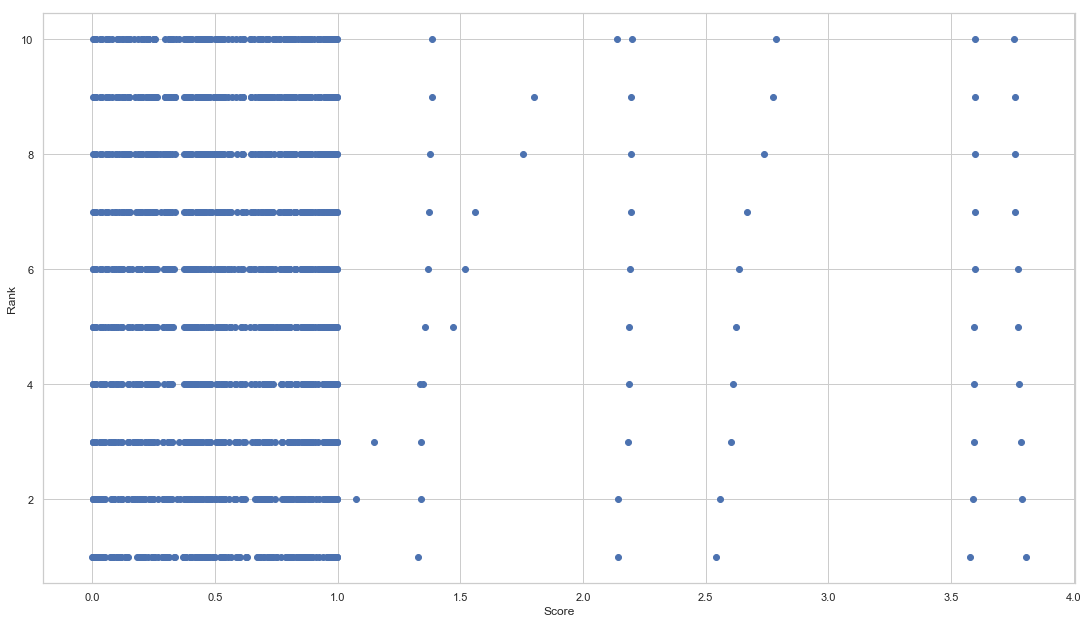

In [136]:
dtEvaluationMetricBlue_11 = modelEvaluationMetric[(modelEvaluationMetric["score"] < 5) &
                                                (modelEvaluationMetric["rank"] <= 10)]

plt.scatter(dtEvaluationMetricBlue_11['score'], dtEvaluationMetricBlue_11['rank'])

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)

plt.xlabel('Score')
plt.ylabel('Rank')

plt.show()

In [76]:
(len(dtEvaluationMetricBlue_11.competitionTitle.unique())/len(dfCompetitionsReward.competitionTitle.unique()))*100

78.82882882882883

#### Normalizando los metodos de evaluación

In [141]:
dtEvaluationMetricNone= modelAveragePublicScore[(modelAveragePublicScore["score"] < 5) &
                                                (modelAveragePublicScore["rank"] == 1)]

In [142]:
dtEvaluationMetricNone["evaluationMetric"] = dtEvaluationMetricNone["evaluationMetric"].replace(['Area Under Receiver Operating Characteristic Curve',
                                                           'Area under the ROC curve (AUC)',
                                                            'Bidirectional AUC for Cause Effect Pairs',
                                                            'Mean Columnwise Area Under Receiver Operating Characteristic Curve',
                                                            'ROC AUC'], 
                                                          'Area Under Curve (AUC)')

dtEvaluationMetricNone["evaluationMetric"] = dtEvaluationMetricNone["evaluationMetric"].replace(['MAP@12',
                                                            'GoogleGlobalAP',
                                                           'MAP@7',
                                                            'MCAP',
                                                            'Mean Average Precision @ 5 (MAP@5)',
                                                            'Mean Average Precision at K',
                                                            'OpenImagesObjectDetectionAP',
                                                            'OpenImagesVisualRelations',
                                                            'RSNAObjectDetectionAP',
                                                            'CVPRAutoDrivingAveragePrecision'], 
                                                          'Mean Average Precision (MAP)')

dtEvaluationMetricNone["evaluationMetric"] = dtEvaluationMetricNone["evaluationMetric"].replace(['Logarithmic loss (logloss)',
                                                           'Multiclass Loss',
                                                            'Multiclass Loss (Deprecated)',
                                                            'Weighted Multiclass Loss',
                                                            'Multi-class logarithmic loss (logloss)'], 
                                                          'Log Loss')


dtEvaluationMetricNone["evaluationMetric"] = dtEvaluationMetricNone["evaluationMetric"].replace(['Root Mean Squared Logarithmic Error',
                                                           'Mean Columnwise Root Mean Squared Logarithmic Error',
                                                            'Normalized Weighted Root Mean Squared Logarithmic Error'], 
                                                          'Root Mean Squared Logarithmic Error (RMSLE)')


dtEvaluationMetricNone["evaluationMetric"] = dtEvaluationMetricNone["evaluationMetric"].replace(['Mean Columnwise Root Mean Squared Error',
                                                           'Root Mean Squared Error'], 
                                                          'Root Mean Squared Error (RMSE)')


dtEvaluationMetricNone["evaluationMetric"] = dtEvaluationMetricNone["evaluationMetric"].replace(['Mean Absolute Error',
                                                           'ZillowMAE'], 
                                                          'Mean Absolute Error (MAE)')

dtEvaluationMetricNone["evaluationMetric"] = dtEvaluationMetricNone["evaluationMetric"].replace(['Weighted Categorization Accuracy'], 
                                                          'Categorization Accuracy')

dtEvaluationMetricNone["evaluationMetric"] = dtEvaluationMetricNone["evaluationMetric"].replace(['Average Jaccard Index',
                                                            'IntersectionOverUnionObjectSegmentation',
                                                            'IntersectionOverUnionObjectSegmentationBeta'], 
                                                          'Intersection over Union (IoU) ')

dtEvaluationMetricNone["evaluationMetric"] = dtEvaluationMetricNone["evaluationMetric"].replace(['Mean F-Score Beta',
                                                          'Dice coefficient'], 
                                                          'F-Score')

dtEvaluationMetricNone["evaluationMetric"] = dtEvaluationMetricNone["evaluationMetric"].replace(['Matthews correlation coefficient'], 
                                                          'Matthews correlation coefficient (MCC)')

Creación de un dataframe auxiliar para completar los datos que faltan

In [143]:
%cd C:\Users\Víctor Galán Alcón\Desktop\Kaggle\Data\dataFramesApoyo

dtEvaluationMetricNone = dtEvaluationMetricNone[["competitionTitle","evaluationMetric"]]
    
dtEvaluationMetricNone.to_csv("dtEvaluationMetric.csv")

C:\Users\Víctor Galán Alcón\Desktop\Kaggle\Data\dataFramesApoyo


In [77]:
%cd C:\Users\Víctor Galán Alcón\Desktop\Kaggle\Data\dataFramesApoyo
    
dtEvaluationMetricCompleted = pd.read_excel('dtEvaluationMetric.xlsx', index_col=0)

dtEvaluationMetricCompleted = dtEvaluationMetricCompleted.rename(columns = {"evaluationMetric" : "evaluationMetricCompleted"})

dtEvaluationMetricCompleted.head()

C:\Users\Víctor Galán Alcón\Desktop\Kaggle\Data\dataFramesApoyo


,evaluationMetricCompleted
competitionTitle,
Google Analytics Customer Revenue Prediction,Root Mean Squared Error (RMSE)
TGS Salt Identification Challenge,Intersection over Union (IoU)
RSNA Pneumonia Detection Challenge,Mean Average Precision (MAP)
PLAsTiCC Astronomical Classification,Log Loss
PetFinder.my Adoption Prediction,QuadraticWeightedKappa


In [78]:
modelEvaluationMetric = pd.merge(modelAveragePublicScore, dtEvaluationMetricCompleted, how = "inner", on = "competitionTitle")
modelEvaluationMetric.head()

,competitionId,teamName,averagePublicScore,contributor,expert,grandmaster,master,novice,staff,rank,entries,evaluationMetric,hostSegment,rewardQuantity,score,totalTeams,competitionTitle,totalMembers,evaluationMetricCompleted
0,1003,0x0x,1.00099,1,0,0,0,0,0,398,12,Root Mean Squared Error,Featured,"$45,000",1.00099,3611.0,Google Analytics Customer Revenue Prediction,1,Root Mean Squared Error (RMSE)
1,1003,2046,0.88843,0,0,0,0,2,0,298,2,Root Mean Squared Error,Featured,"$45,000",0.88843,3611.0,Google Analytics Customer Revenue Prediction,2,Root Mean Squared Error (RMSE)
2,1003,25教最帅,1.63786,0,0,0,0,1,0,559,5,Root Mean Squared Error,Featured,"$45,000",1.63786,3611.0,Google Analytics Customer Revenue Prediction,1,Root Mean Squared Error (RMSE)
3,1003,313,0.88474,1,0,0,0,1,0,25,7,Root Mean Squared Error,Featured,"$45,000",0.88474,3611.0,Google Analytics Customer Revenue Prediction,2,Root Mean Squared Error (RMSE)
4,1003,409 Huntington Ave,2.25716,1,0,0,0,1,0,787,1,Root Mean Squared Error,Featured,"$45,000",2.25716,3611.0,Google Analytics Customer Revenue Prediction,2,Root Mean Squared Error (RMSE)


In [79]:
modelEvaluationMetric = modelEvaluationMetric.drop(columns = ["evaluationMetric"])

In [80]:
(len(modelEvaluationMetric.competitionTitle.unique())/len(dfCompetitionsReward.competitionTitle.unique()))*100

74.77477477477478

   <a id=8></a>
**<h3>3.4 totalTeams completo</h3>**

In [81]:
modelEvaluationMetric["totalTeams"] = modelEvaluationMetric.totalTeams.fillna(0)

In [82]:
print(modelEvaluationMetric.isnull().sum())

competitionId                0
teamName                     0
averagePublicScore           0
contributor                  0
expert                       0
grandmaster                  0
master                       0
novice                       0
staff                        0
rank                         0
entries                      0
hostSegment                  0
rewardQuantity               0
score                        0
totalTeams                   0
competitionTitle             0
totalMembers                 0
evaluationMetricCompleted    0
dtype: int64


In [83]:
totalTeamExtra = modelEvaluationMetric.groupby('competitionTitle', as_index=False).agg({"rank": "max"})
totalTeamExtra = totalTeamExtra.rename(columns = {"rank" : "totalTeamExtra"})
totalTeamExtra.head()

,competitionTitle,totalTeamExtra
0,2018 Data Science Bowl,739
1,Acquire Valued Shoppers Challenge,952
2,Africa Soil Property Prediction Challenge,1233
3,Airbus Ship Detection Challenge,882
4,Algorithmic Trading Challenge,111


In [84]:
dtTotalTeamExtra = pd.merge(totalTeamExtra,modelEvaluationMetric, how = "inner", on = "competitionTitle")
dtTotalTeamExtra.head()

,competitionTitle,totalTeamExtra,competitionId,teamName,averagePublicScore,contributor,expert,grandmaster,master,novice,staff,rank,entries,hostSegment,rewardQuantity,score,totalTeams,totalMembers,evaluationMetricCompleted
0,2018 Data Science Bowl,739,8089,0.000,0.38779,0,0,0,1,0,0,469,0,featured,100000,0.38779,0.0,1,Intersection over Union (IoU)
1,2018 Data Science Bowl,739,8089,2083,0.50263,0,2,0,0,0,0,134,2,featured,100000,0.50263,0.0,2,Intersection over Union (IoU)
2,2018 Data Science Bowl,739,8089,311,0.48623,0,0,0,0,3,0,194,4,featured,100000,0.48623,0.0,3,Intersection over Union (IoU)
3,2018 Data Science Bowl,739,8089,42,0.55320,0,0,0,0,3,0,44,7,featured,100000,0.55320,0.0,3,Intersection over Union (IoU)
4,2018 Data Science Bowl,739,8089,A Skeptic,0.39779,0,0,0,0,1,0,450,6,featured,100000,0.39779,0.0,1,Intersection over Union (IoU)


In [85]:
dtTotalTeamExtra.loc[dtTotalTeamExtra["totalTeams"] <= 0, "totalTeams"] = dtTotalTeamExtra["totalTeamExtra"]

In [86]:
print(dtTotalTeamExtra.isnull().sum())

competitionTitle             0
totalTeamExtra               0
competitionId                0
teamName                     0
averagePublicScore           0
contributor                  0
expert                       0
grandmaster                  0
master                       0
novice                       0
staff                        0
rank                         0
entries                      0
hostSegment                  0
rewardQuantity               0
score                        0
totalTeams                   0
totalMembers                 0
evaluationMetricCompleted    0
dtype: int64


In [87]:
modelTotalTeams = dtTotalTeamExtra.drop(columns=['totalTeamExtra'])

   <a id=9></a>
**<h3>3.5 totalEntries completo</h3>**

In [88]:
totalEntries = modelTotalTeams.groupby('competitionTitle', as_index=False).agg({"entries": "sum"})
totalEntries = totalEntries.rename(columns = {"entries" : "totalEntries"})
totalEntries.head()

,competitionTitle,totalEntries
0,2018 Data Science Bowl,1249
1,Acquire Valued Shoppers Challenge,25194
2,Africa Soil Property Prediction Challenge,18314
3,Airbus Ship Detection Challenge,12496
4,Algorithmic Trading Challenge,1406


In [89]:
modelTotalEntries = pd.merge(totalEntries,modelTotalTeams, how = "inner", on = "competitionTitle")
modelTotalEntries.head()

,competitionTitle,totalEntries,competitionId,teamName,averagePublicScore,contributor,expert,grandmaster,master,novice,staff,rank,entries,hostSegment,rewardQuantity,score,totalTeams,totalMembers,evaluationMetricCompleted
0,2018 Data Science Bowl,1249,8089,0.000,0.38779,0,0,0,1,0,0,469,0,featured,100000,0.38779,739.0,1,Intersection over Union (IoU)
1,2018 Data Science Bowl,1249,8089,2083,0.50263,0,2,0,0,0,0,134,2,featured,100000,0.50263,739.0,2,Intersection over Union (IoU)
2,2018 Data Science Bowl,1249,8089,311,0.48623,0,0,0,0,3,0,194,4,featured,100000,0.48623,739.0,3,Intersection over Union (IoU)
3,2018 Data Science Bowl,1249,8089,42,0.55320,0,0,0,0,3,0,44,7,featured,100000,0.55320,739.0,3,Intersection over Union (IoU)
4,2018 Data Science Bowl,1249,8089,A Skeptic,0.39779,0,0,0,0,1,0,450,6,featured,100000,0.39779,739.0,1,Intersection over Union (IoU)


   <a id=10></a>
**<h3>3.6 Total Tiers</h3>**

In [90]:
totalContributor = modelTotalEntries.groupby('competitionTitle', as_index=False).agg({"contributor": "sum"})
totalContributor = totalContributor.rename(columns = {"contributor" : "totalContributor"})
totalContributor.head()

,competitionTitle,totalContributor
0,2018 Data Science Bowl,127
1,Acquire Valued Shoppers Challenge,3671
2,Africa Soil Property Prediction Challenge,2412
3,Airbus Ship Detection Challenge,821
4,Algorithmic Trading Challenge,373


In [91]:
totalExpert = modelTotalEntries.groupby('competitionTitle', as_index=False).agg({"expert": "sum"})
totalExpert = totalExpert.rename(columns = {"expert" : "totalExpert"})

totalExpert = pd.merge(totalExpert,totalContributor, how = "inner", on = "competitionTitle")
totalExpert.head()

,competitionTitle,totalExpert,totalContributor
0,2018 Data Science Bowl,239,127
1,Acquire Valued Shoppers Challenge,1551,3671
2,Africa Soil Property Prediction Challenge,1604,2412
3,Airbus Ship Detection Challenge,1226,821
4,Algorithmic Trading Challenge,78,373


In [92]:
totalGrandmaster = modelTotalEntries.groupby('competitionTitle', as_index=False).agg({"grandmaster": "sum"})
totalGrandmaster = totalGrandmaster.rename(columns = {"grandmaster" : "totalGrandmaster"})

totalGrandmaster = pd.merge(totalExpert,totalGrandmaster, how = "inner", on = "competitionTitle")

totalGrandmaster.head()

,competitionTitle,totalExpert,totalContributor,totalGrandmaster
0,2018 Data Science Bowl,239,127,21
1,Acquire Valued Shoppers Challenge,1551,3671,755
2,Africa Soil Property Prediction Challenge,1604,2412,479
3,Airbus Ship Detection Challenge,1226,821,219
4,Algorithmic Trading Challenge,78,373,84


In [93]:
totalMaster = modelTotalEntries.groupby('competitionTitle', as_index=False).agg({"master": "sum"})
totalMaster = totalMaster.rename(columns = {"master" : "totalMaster"})

totalMaster = pd.merge(totalMaster,totalGrandmaster, how = "inner", on = "competitionTitle")

totalMaster .head()

,competitionTitle,totalMaster,totalExpert,totalContributor,totalGrandmaster
0,2018 Data Science Bowl,89,239,127,21
1,Acquire Valued Shoppers Challenge,1243,1551,3671,755
2,Africa Soil Property Prediction Challenge,730,1604,2412,479
3,Airbus Ship Detection Challenge,1012,1226,821,219
4,Algorithmic Trading Challenge,96,78,373,84


In [94]:
totalNovice = modelTotalEntries.groupby('competitionTitle', as_index=False).agg({"novice": "sum"})
totalNovice = totalNovice.rename(columns = {"novice" : "totalNovice"})

totalNovice = pd.merge(totalMaster,totalNovice, how = "inner", on = "competitionTitle")

totalNovice.head()

,competitionTitle,totalMaster,totalExpert,totalContributor,totalGrandmaster,totalNovice
0,2018 Data Science Bowl,89,239,127,21,619
1,Acquire Valued Shoppers Challenge,1243,1551,3671,755,513
2,Africa Soil Property Prediction Challenge,730,1604,2412,479,651
3,Airbus Ship Detection Challenge,1012,1226,821,219,2234
4,Algorithmic Trading Challenge,96,78,373,84,24


In [95]:
totalStaff = modelTotalEntries.groupby('competitionTitle', as_index=False).agg({"staff": "sum"})
totalStaff = totalStaff.rename(columns = {"staff" : "totalStaff"})

totalStaff = pd.merge(totalStaff,totalNovice, how = "inner", on = "competitionTitle")

totalStaff.head()

,competitionTitle,totalStaff,totalMaster,totalExpert,totalContributor,totalGrandmaster,totalNovice
0,2018 Data Science Bowl,0,89,239,127,21,619
1,Acquire Valued Shoppers Challenge,56,1243,1551,3671,755,513
2,Africa Soil Property Prediction Challenge,21,730,1604,2412,479,651
3,Airbus Ship Detection Challenge,0,1012,1226,821,219,2234
4,Algorithmic Trading Challenge,11,96,78,373,84,24


In [96]:
modelTotalTiers = pd.merge(totalStaff,modelTotalEntries, how = "inner", on = "competitionTitle")

In [97]:
modelTotalTiers["totalStaff"] = modelTotalTiers["totalStaff"] - modelTotalTiers["staff"]
modelTotalTiers["totalMaster"] = modelTotalTiers["totalMaster"] - modelTotalTiers["master"]
modelTotalTiers["totalExpert"] = modelTotalTiers["totalExpert"] - modelTotalTiers["expert"]
modelTotalTiers["totalContributor"] = modelTotalTiers["totalContributor"] - modelTotalTiers["contributor"]
modelTotalTiers["totalGrandmaster"] = modelTotalTiers["totalGrandmaster"] - modelTotalTiers["grandmaster"]
modelTotalTiers["totalNovice"] = modelTotalTiers["totalNovice"] - modelTotalTiers["novice"]

modelTotalTiers.head(20)

,competitionTitle,totalStaff,totalMaster,totalExpert,totalContributor,totalGrandmaster,totalNovice,totalEntries,competitionId,teamName,...,novice,staff,rank,entries,hostSegment,rewardQuantity,score,totalTeams,totalMembers,evaluationMetricCompleted
0,2018 Data Science Bowl,0,88,239,127,21,619,1249,8089,0.000,...,0,0,469,0,featured,100000,0.38779,739.0,1,Intersection over Union (IoU)
1,2018 Data Science Bowl,0,89,237,127,21,619,1249,8089,2083,...,0,0,134,2,featured,100000,0.50263,739.0,2,Intersection over Union (IoU)
2,2018 Data Science Bowl,0,89,239,127,21,616,1249,8089,311,...,3,0,194,4,featured,100000,0.48623,739.0,3,Intersection over Union (IoU)
3,2018 Data Science Bowl,0,89,239,127,21,616,1249,8089,42,...,3,0,44,7,featured,100000,0.55320,739.0,3,Intersection over Union (IoU)
4,2018 Data Science Bowl,0,89,239,127,21,618,1249,8089,A Skeptic,...,1,0,450,6,featured,100000,0.39779,739.0,1,Intersection over Union (IoU)
5,2018 Data Science Bowl,0,89,239,127,21,618,1249,8089,A.S.,...,1,0,57,4,featured,100000,0.54294,739.0,1,Intersection over Union (IoU)
6,2018 Data Science Bowl,0,89,239,127,21,618,1249,8089,A.S. Tarantoga,...,1,0,447,1,featured,100000,0.39817,739.0,1,Intersection over Union (IoU)
7,2018 Data Science Bowl,0,89,239,127,21,618,1249,8089,ABI,...,1,0,542,0,featured,100000,0.34775,739.0,1,Intersection over Union (IoU)
8,2018 Data Science Bowl,0,89,239,127,20,619,1249,8089,ACS,...,0,0,6,1,featured,100000,0.59407,739.0,1,Intersection over Union (IoU)
9,2018 Data Science Bowl,0,89,239,127,21,618,1249,8089,APISI,...,1,0,636,0,featured,100000,0.24292,739.0,1,Intersection over Union (IoU)


   <a id=11></a>
**<h3>3.7 Categorizacion de HostSegment</h3>**

In [98]:
modelTotalTiers["hostSegment"].unique()

array(['featured', 'Research', 'Featured', 'masters', 'Recruitment',
       'research', 'Playground'], dtype=object)

In [99]:
modelTotalTiers["hostSegment"] = modelTotalTiers["hostSegment"].replace(['featured'], 
                                                          'Featured')

modelTotalTiers["hostSegment"] = modelTotalTiers["hostSegment"].replace(['research'], 
                                                          'Research')

modelTotalTiers["hostSegment"].unique()

array(['Featured', 'Research', 'masters', 'Recruitment', 'Playground'],
      dtype=object)

In [100]:
dtHostSegment = modelTotalTiers[["competitionTitle","hostSegment"]]
dtHostSegment["ones"] = 1
dtHostSegment.head()

,competitionTitle,hostSegment,ones
0,2018 Data Science Bowl,Featured,1
1,2018 Data Science Bowl,Featured,1
2,2018 Data Science Bowl,Featured,1
3,2018 Data Science Bowl,Featured,1
4,2018 Data Science Bowl,Featured,1


In [101]:
dtHostSegmentCategorization = pd.pivot_table(dtHostSegment, values='ones', index=['competitionTitle'],
                       columns=['hostSegment'], aggfunc=np.max)

dtHostSegmentCategorization.head()

hostSegment,Featured,Playground,Recruitment,Research,masters
competitionTitle,,,,,
2018 Data Science Bowl,1.0,NaN,NaN,NaN,NaN
Acquire Valued Shoppers Challenge,1.0,NaN,NaN,NaN,NaN
Africa Soil Property Prediction Challenge,NaN,NaN,NaN,1.0,NaN
Airbus Ship Detection Challenge,1.0,NaN,NaN,NaN,NaN
Algorithmic Trading Challenge,1.0,NaN,NaN,NaN,NaN


In [102]:
dtHostSegmentCategorization = dtHostSegmentCategorization.fillna(0)
dtHostSegmentCategorization.head()

hostSegment,Featured,Playground,Recruitment,Research,masters
competitionTitle,,,,,
2018 Data Science Bowl,1.0,0.0,0.0,0.0,0.0
Acquire Valued Shoppers Challenge,1.0,0.0,0.0,0.0,0.0
Africa Soil Property Prediction Challenge,0.0,0.0,0.0,1.0,0.0
Airbus Ship Detection Challenge,1.0,0.0,0.0,0.0,0.0
Algorithmic Trading Challenge,1.0,0.0,0.0,0.0,0.0


In [103]:
modelhostSegment = pd.merge(dtHostSegmentCategorization,modelTotalTiers, how = "inner", on = "competitionTitle")
modelhostSegment.head()

,competitionTitle,Featured,Playground,Recruitment,Research,masters,totalStaff,totalMaster,totalExpert,totalContributor,...,novice,staff,rank,entries,hostSegment,rewardQuantity,score,totalTeams,totalMembers,evaluationMetricCompleted
0,2018 Data Science Bowl,1.0,0.0,0.0,0.0,0.0,0,88,239,127,...,0,0,469,0,Featured,100000,0.38779,739.0,1,Intersection over Union (IoU)
1,2018 Data Science Bowl,1.0,0.0,0.0,0.0,0.0,0,89,237,127,...,0,0,134,2,Featured,100000,0.50263,739.0,2,Intersection over Union (IoU)
2,2018 Data Science Bowl,1.0,0.0,0.0,0.0,0.0,0,89,239,127,...,3,0,194,4,Featured,100000,0.48623,739.0,3,Intersection over Union (IoU)
3,2018 Data Science Bowl,1.0,0.0,0.0,0.0,0.0,0,89,239,127,...,3,0,44,7,Featured,100000,0.55320,739.0,3,Intersection over Union (IoU)
4,2018 Data Science Bowl,1.0,0.0,0.0,0.0,0.0,0,89,239,127,...,1,0,450,6,Featured,100000,0.39779,739.0,1,Intersection over Union (IoU)


In [104]:
modelhostSegment = modelhostSegment.drop(columns = ["hostSegment"])

   <a id=12></a>
**<h3>3.8 Categorizacion de evaluationMetricCompleted</h3>**

In [105]:
dtEvaluationMetricCompleted = modelhostSegment[["competitionTitle","evaluationMetricCompleted"]]
dtEvaluationMetricCompleted["ones"] = 1

dtEvaluationMetricCompleted.head()

,competitionTitle,evaluationMetricCompleted,ones
0,2018 Data Science Bowl,Intersection over Union (IoU),1
1,2018 Data Science Bowl,Intersection over Union (IoU),1
2,2018 Data Science Bowl,Intersection over Union (IoU),1
3,2018 Data Science Bowl,Intersection over Union (IoU),1
4,2018 Data Science Bowl,Intersection over Union (IoU),1


In [106]:
dtEvaluationMetricCategorization = pd.pivot_table(dtEvaluationMetricCompleted, values='ones', index=['competitionTitle'],
                       columns=['evaluationMetricCompleted'], aggfunc=np.max)

dtEvaluationMetricCategorization.head()

evaluationMetricCompleted,Area Under Curve (AUC),Categorization Accuracy,Continuous Ranked Probability Score (CRPS),DarkWorldsMetric,Discounted cumulative gain (DCG),F-Score,Gesture Normalized Levenshtein Mean,Intersection over Union (IoU),Log Loss,Matthews correlation coefficient (MCC),Mean Absolute Error (MAE),Mean Average Precision (MAP),Normalized Gini Index,QuadraticWeightedKappa,Root Mean Square Percentage Error (RMSPE),Root Mean Squared Error (RMSE),Root Mean Squared Logarithmic Error (RMSLE),approximate median significance (AMS)
competitionTitle,,,,,,,,,,,,,,,,,,
2018 Data Science Bowl,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Acquire Valued Shoppers Challenge,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Africa Soil Property Prediction Challenge,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
Airbus Ship Detection Challenge,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Algorithmic Trading Challenge,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN


In [107]:
dtEvaluationMetricCategorization = dtEvaluationMetricCategorization.fillna(0)
dtEvaluationMetricCategorization.head()

evaluationMetricCompleted,Area Under Curve (AUC),Categorization Accuracy,Continuous Ranked Probability Score (CRPS),DarkWorldsMetric,Discounted cumulative gain (DCG),F-Score,Gesture Normalized Levenshtein Mean,Intersection over Union (IoU),Log Loss,Matthews correlation coefficient (MCC),Mean Absolute Error (MAE),Mean Average Precision (MAP),Normalized Gini Index,QuadraticWeightedKappa,Root Mean Square Percentage Error (RMSPE),Root Mean Squared Error (RMSE),Root Mean Squared Logarithmic Error (RMSLE),approximate median significance (AMS)
competitionTitle,,,,,,,,,,,,,,,,,,
2018 Data Science Bowl,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Acquire Valued Shoppers Challenge,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Africa Soil Property Prediction Challenge,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
Airbus Ship Detection Challenge,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Algorithmic Trading Challenge,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [108]:
modelEvaluationMetricCategorization = pd.merge(modelhostSegment,dtEvaluationMetricCategorization, how = "inner", on = "competitionTitle")
modelEvaluationMetricCategorization.head()

,competitionTitle,Featured,Playground,Recruitment,Research,masters,totalStaff,totalMaster,totalExpert,totalContributor,...,Log Loss,Matthews correlation coefficient (MCC),Mean Absolute Error (MAE),Mean Average Precision (MAP),Normalized Gini Index,QuadraticWeightedKappa,Root Mean Square Percentage Error (RMSPE),Root Mean Squared Error (RMSE),Root Mean Squared Logarithmic Error (RMSLE),approximate median significance (AMS)
0,2018 Data Science Bowl,1.0,0.0,0.0,0.0,0.0,0,88,239,127,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2018 Data Science Bowl,1.0,0.0,0.0,0.0,0.0,0,89,237,127,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2018 Data Science Bowl,1.0,0.0,0.0,0.0,0.0,0,89,239,127,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2018 Data Science Bowl,1.0,0.0,0.0,0.0,0.0,0,89,239,127,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2018 Data Science Bowl,1.0,0.0,0.0,0.0,0.0,0,89,239,127,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [109]:
modelEvaluationMetricCategorization = modelEvaluationMetricCategorization.drop(columns = ["evaluationMetricCompleted"])

In [110]:
modelEvaluationMetricCategorization.dtypes

competitionTitle                               object 
Featured                                       float64
Playground                                     float64
Recruitment                                    float64
Research                                       float64
masters                                        float64
totalStaff                                     int32  
totalMaster                                    int32  
totalExpert                                    int32  
totalContributor                               int32  
totalGrandmaster                               int32  
totalNovice                                    int32  
totalEntries                                   int64  
competitionId                                  int64  
teamName                                       object 
averagePublicScore                             float64
contributor                                    int32  
expert                                         int32  
grandmaste

   <a id=13></a>
**<h3>3.9 Trasformacion de la columna rewardQuantity</h3>**

In [112]:
modelEvaluationMetricCategorization['rewardQuantity'] = modelEvaluationMetricCategorization['rewardQuantity'].astype(str)
modelEvaluationMetricCategorization['rewardQuantity']=[each.replace(",","") for each in modelEvaluationMetricCategorization['rewardQuantity']]
modelEvaluationMetricCategorization['rewardQuantity']=[each.replace("$","") for each in modelEvaluationMetricCategorization['rewardQuantity']]
modelEvaluationMetricCategorization['rewardQuantity']=[each.replace("€","") for each in modelEvaluationMetricCategorization['rewardQuantity']]

In [113]:
modelEvaluationMetricCategorization.head(10)

,competitionTitle,Featured,Playground,Recruitment,Research,masters,totalStaff,totalMaster,totalExpert,totalContributor,...,Log Loss,Matthews correlation coefficient (MCC),Mean Absolute Error (MAE),Mean Average Precision (MAP),Normalized Gini Index,QuadraticWeightedKappa,Root Mean Square Percentage Error (RMSPE),Root Mean Squared Error (RMSE),Root Mean Squared Logarithmic Error (RMSLE),approximate median significance (AMS)
0,2018 Data Science Bowl,1.0,0.0,0.0,0.0,0.0,0,88,239,127,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2018 Data Science Bowl,1.0,0.0,0.0,0.0,0.0,0,89,237,127,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2018 Data Science Bowl,1.0,0.0,0.0,0.0,0.0,0,89,239,127,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2018 Data Science Bowl,1.0,0.0,0.0,0.0,0.0,0,89,239,127,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2018 Data Science Bowl,1.0,0.0,0.0,0.0,0.0,0,89,239,127,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2018 Data Science Bowl,1.0,0.0,0.0,0.0,0.0,0,89,239,127,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,2018 Data Science Bowl,1.0,0.0,0.0,0.0,0.0,0,89,239,127,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,2018 Data Science Bowl,1.0,0.0,0.0,0.0,0.0,0,89,239,127,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,2018 Data Science Bowl,1.0,0.0,0.0,0.0,0.0,0,89,239,127,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,2018 Data Science Bowl,1.0,0.0,0.0,0.0,0.0,0,89,239,127,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [114]:
modelEvaluationMetricCategorization['rewardQuantity'] = modelEvaluationMetricCategorization['rewardQuantity'].astype(float).astype(int)

   <a id=14></a>
**<h3>3.10 totalAveragePublicScore </h3>**

In [115]:
dttotalAveragePublicScore = modelEvaluationMetricCategorization.groupby('competitionTitle')["averagePublicScore"].agg({"totalAveragePublicScore":"mean"})
dttotalAveragePublicScore = dttotalAveragePublicScore.reset_index()
dttotalAveragePublicScore.head()

,competitionTitle,totalAveragePublicScore
0,2018 Data Science Bowl,0.389967
1,Acquire Valued Shoppers Challenge,0.555796
2,Africa Soil Property Prediction Challenge,4.000227
3,Airbus Ship Detection Challenge,0.624496
4,Algorithmic Trading Challenge,11.569377


In [116]:
modeltotalAveragePublicScore = pd.merge(dttotalAveragePublicScore,modelEvaluationMetricCategorization, how = "inner", on = "competitionTitle")
modeltotalAveragePublicScore.head()

,competitionTitle,totalAveragePublicScore,Featured,Playground,Recruitment,Research,masters,totalStaff,totalMaster,totalExpert,...,Log Loss,Matthews correlation coefficient (MCC),Mean Absolute Error (MAE),Mean Average Precision (MAP),Normalized Gini Index,QuadraticWeightedKappa,Root Mean Square Percentage Error (RMSPE),Root Mean Squared Error (RMSE),Root Mean Squared Logarithmic Error (RMSLE),approximate median significance (AMS)
0,2018 Data Science Bowl,0.389967,1.0,0.0,0.0,0.0,0.0,0,88,239,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2018 Data Science Bowl,0.389967,1.0,0.0,0.0,0.0,0.0,0,89,237,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2018 Data Science Bowl,0.389967,1.0,0.0,0.0,0.0,0.0,0,89,239,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2018 Data Science Bowl,0.389967,1.0,0.0,0.0,0.0,0.0,0,89,239,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2018 Data Science Bowl,0.389967,1.0,0.0,0.0,0.0,0.0,0,89,239,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


   <a id=15></a>
**<h3>3.11 Position Public </h3>**

In [117]:
dfRankPublic = df[["competitionTitle","rank","change"]]
dfRankPublic = dfRankPublic.drop_duplicates()

dfRankPublic.fillna(0, inplace = True)

dfRankPublic.head()

,competitionTitle,rank,change
0,Acquire Valued Shoppers Challenge,138,-21
18,Acquire Valued Shoppers Challenge,849,10
19,Acquire Valued Shoppers Challenge,363,2
24,Acquire Valued Shoppers Challenge,382,-12
31,Acquire Valued Shoppers Challenge,850,10


In [118]:
dfRankPublic["rankPublic"] = dfRankPublic["rank"] + dfRankPublic["change"]
dfRankPublic.head()

,competitionTitle,rank,change,rankPublic
0,Acquire Valued Shoppers Challenge,138,-21,117
18,Acquire Valued Shoppers Challenge,849,10,859
19,Acquire Valued Shoppers Challenge,363,2,365
24,Acquire Valued Shoppers Challenge,382,-12,370
31,Acquire Valued Shoppers Challenge,850,10,860


In [119]:
dfRankPublic["rankPublic"] = dfRankPublic["rankPublic"].replace(['NoneNone'], 0)

dfRankPublic["rankPublic"] = dfRankPublic["rankPublic"].astype(float).astype(int)

dfRankPublic["rankPublic"].describe()


count    176395.000000
mean     1188.646214  
std      1214.174539  
min      0.000000     
25%      278.000000   
50%      800.000000   
75%      1690.000000  
max      7198.000000  
Name: rankPublic, dtype: float64

In [120]:
dfRankPublic = dfRankPublic.drop(columns = ["change"])

In [121]:
modelRankPublic = pd.merge(modeltotalAveragePublicScore,dfRankPublic, how = "inner", on = ["competitionTitle","rank"])
modelRankPublic.head()

,competitionTitle,totalAveragePublicScore,Featured,Playground,Recruitment,Research,masters,totalStaff,totalMaster,totalExpert,...,Matthews correlation coefficient (MCC),Mean Absolute Error (MAE),Mean Average Precision (MAP),Normalized Gini Index,QuadraticWeightedKappa,Root Mean Square Percentage Error (RMSPE),Root Mean Squared Error (RMSE),Root Mean Squared Logarithmic Error (RMSLE),approximate median significance (AMS),rankPublic
0,2018 Data Science Bowl,0.389967,1.0,0.0,0.0,0.0,0.0,0,88,239,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,209
1,2018 Data Science Bowl,0.389967,1.0,0.0,0.0,0.0,0.0,0,89,237,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,253
2,2018 Data Science Bowl,0.389967,1.0,0.0,0.0,0.0,0.0,0,89,239,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,727
3,2018 Data Science Bowl,0.389967,1.0,0.0,0.0,0.0,0.0,0,89,239,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,265
4,2018 Data Science Bowl,0.389967,1.0,0.0,0.0,0.0,0.0,0,89,239,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,129


   <a id=15></a>
**<h3>3.11 Rangos de posiciones en Ranking </h3>**

In [122]:
modeltotalAveragePublicScore["rank"] = modeltotalAveragePublicScore["rank"].astype(float).astype(int)

In [123]:
def set_rank(row):
        
    if row["rank"] <= 10:
        return 10
    
    elif row["rank"] > 10 and row["rank"] <= 20:
        return 20
    
    elif row["rank"] > 20 and row["rank"] <= 30:
        return 30
    
    elif row["rank"] > 30 and row["rank"] <= 40:
        return 40

    elif row["rank"] > 40 and row["rank"] <= 50:
        return 50
    
    elif row["rank"] > 50 and row["rank"] <= 60:
        return 60
    
    elif row["rank"] > 60 and row["rank"] <= 70:
        return 70
    
    elif row["rank"] > 70 and row["rank"] <= 80:
        return 80
    
    elif row["rank"] > 80 and row["rank"] <= 90:
        return 90
    
    elif row["rank"] > 90 and row["rank"] <= 100:
        return 100
    
    elif row["rank"] > 100 and row["rank"] <= 110:
        return 110
    
    elif row["rank"] > 110 and row["rank"] <= 120:
        return 120
    
    elif row["rank"] > 120 and row["rank"] <= 130:
        return 130
    
    elif row["rank"] > 130 and row["rank"] <= 140:
        return 140
    
    elif row["rank"] > 140 and row["rank"] <= 150:
        return 150
    
    else:
        return 200



modelRanked = modelRankPublic.assign(PositionRanked=modelRankPublic.apply(set_rank, axis=1))

modelRanked.head()


,competitionTitle,totalAveragePublicScore,Featured,Playground,Recruitment,Research,masters,totalStaff,totalMaster,totalExpert,...,Mean Absolute Error (MAE),Mean Average Precision (MAP),Normalized Gini Index,QuadraticWeightedKappa,Root Mean Square Percentage Error (RMSPE),Root Mean Squared Error (RMSE),Root Mean Squared Logarithmic Error (RMSLE),approximate median significance (AMS),rankPublic,PositionRanked
0,2018 Data Science Bowl,0.389967,1.0,0.0,0.0,0.0,0.0,0,88,239,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,209,200
1,2018 Data Science Bowl,0.389967,1.0,0.0,0.0,0.0,0.0,0,89,237,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,253,140
2,2018 Data Science Bowl,0.389967,1.0,0.0,0.0,0.0,0.0,0,89,239,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,727,200
3,2018 Data Science Bowl,0.389967,1.0,0.0,0.0,0.0,0.0,0,89,239,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,265,50
4,2018 Data Science Bowl,0.389967,1.0,0.0,0.0,0.0,0.0,0,89,239,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,129,200


   <a id=16></a>
**<h2>4 Exportación del Modelo Final </h2>**

In [124]:
dfmodel = modelRanked

In [126]:
model = dfmodel.drop(columns = ["score","competitionTitle","competitionId","teamName"])

In [127]:
model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 151217 entries, 0 to 151216
Data columns (total 45 columns):
totalAveragePublicScore                        151217 non-null float64
Featured                                       151217 non-null float64
Playground                                     151217 non-null float64
Recruitment                                    151217 non-null float64
Research                                       151217 non-null float64
masters                                        151217 non-null float64
totalStaff                                     151217 non-null int32
totalMaster                                    151217 non-null int32
totalExpert                                    151217 non-null int32
totalContributor                               151217 non-null int32
totalGrandmaster                               151217 non-null int32
totalNovice                                    151217 non-null int32
totalEntries                                   15

Transformación correspondiente de formato

In [144]:
model.iloc[:,1:6] = model.iloc[:,1:6].astype(int)

model.totalTeams = model.totalTeams.astype(int) 

model.iloc[:,24:] = model.iloc[:,24:].astype(int)

In [129]:
model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 151217 entries, 0 to 151216
Data columns (total 45 columns):
totalAveragePublicScore                        151217 non-null float64
Featured                                       151217 non-null int32
Playground                                     151217 non-null int32
Recruitment                                    151217 non-null int32
Research                                       151217 non-null int32
masters                                        151217 non-null int32
totalStaff                                     151217 non-null int32
totalMaster                                    151217 non-null int32
totalExpert                                    151217 non-null int32
totalContributor                               151217 non-null int32
totalGrandmaster                               151217 non-null int32
totalNovice                                    151217 non-null int32
totalEntries                                   151217 non-n

In [130]:
%cd C:\Users\Víctor Galán Alcón\Desktop\Kaggle\Data\dataModel
model.to_csv("modelo.csv")

C:\Users\Víctor Galán Alcón\Desktop\Kaggle\Data\dataModel
